
# Term Project1 - DSC680


# ChurnShield: Predictive Analytics for Telecom Customer Retention

#### Author by: Shanthibooshan Subramanian

## Code for Term Project

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

## Data Preparation

In [2]:
# Read the telecom customer churn dataset
telecom_churn_df = pd.read_csv('Telecom_Customer_Churn.csv')

# Get the number of rows and columns in the dataset
rows, columns = telecom_churn_df.shape

# Output the dimensions of the dataset
print(f"Dataset Dimensions: {rows} rows, {columns} columns")

# Preview the first few entries in the dataset to understand its structure and contents
telecom_churn_df.head()

Dataset Dimensions: 7043 rows, 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The telecom customer churn dataset contains 7043 rows and 21 columns, indicating it encompasses a substantial amount of customer data with various attributes. The dataset provides insights into customer characteristics and behaviors that could potentially influence churn predictions and retention strategies in the telecom industry.

In [3]:
# Retrieve the structure of the dataset
dataset_structure = telecom_churn_df.info()

# Display the structure of the dataset
print("\nDataset Structure:")
print(dataset_structure)

# Get a preview of the first few rows in the dataset to understand its content
print("\nFirst 5 Rows of the Dataset:")
print(telecom_churn_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Understanding the dataset's structure and previewing its initial rows helps in assessing its size, column names, data types, and identifying any immediate data quality issues, crucial for planning subsequent data preprocessing and analysis steps.

In [4]:
# Generate summary statistics for numerical columns
numerical_summary = telecom_churn_df.describe()

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(numerical_summary)




Summary Statistics for Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


I am generating summary statistics for numerical columns to understand the central tendency, dispersion, and distribution of key variables like tenure and MonthlyCharges, which helps in identifying outliers, understanding data ranges, and preparing for further analytical tasks.

In [5]:
# Check for missing values in each column
missing_values = telecom_churn_df.isnull().sum()

# Display the count of missing values for each column
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



I checked for missing values in each column of the dataset to ensure data completeness and integrity before proceeding with further analysis. All columns were confirmed to have no missing values, which ensures the reliability of subsequent analytical tasks.

## Data Visualization

# Distribution of Churn:

This bar plot shows the count of churned vs. non-churned customers. It helps to understand the proportion of customers who churned.

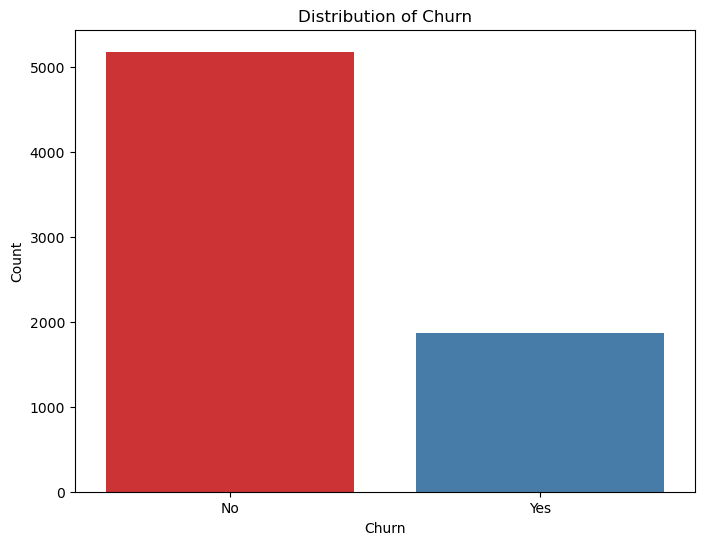

In [6]:
# Visualization 1: Distribution of Churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telecom_churn_df, palette='Set1')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap between Numerical Features:

This heatmap visualizes the correlation coefficients between numerical features. High correlations (positive or negative) might indicate strong relationships between variables.

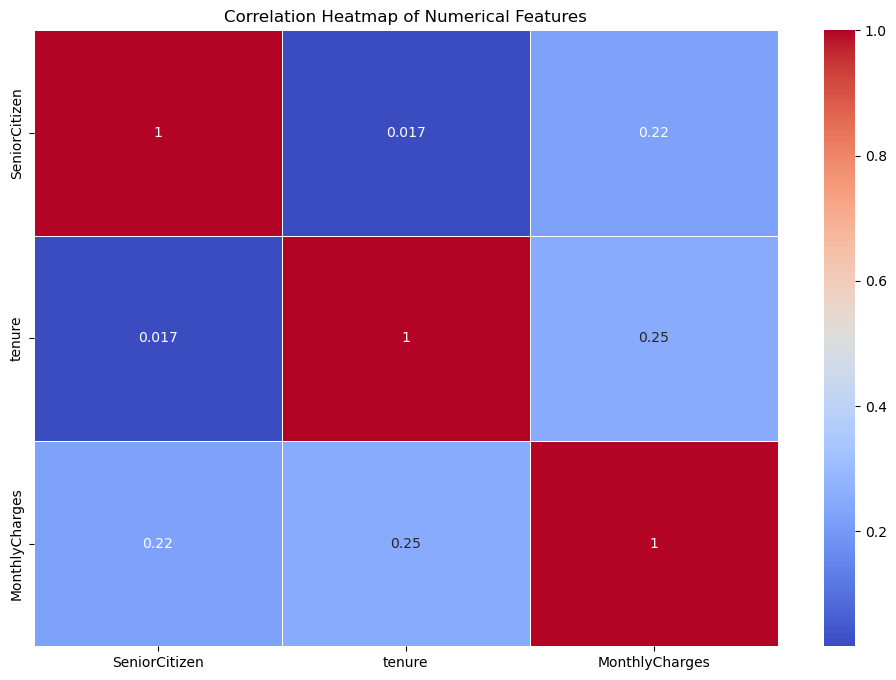

In [7]:
# Visualization 2: Correlation Heatmap between Numerical Features

plt.figure(figsize=(12, 8))
sns.heatmap(telecom_churn_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Churn by Contract Type:

This bar plot shows the count of churned and non-churned customers across different contract types. It helps identify which contract types have higher churn rates.

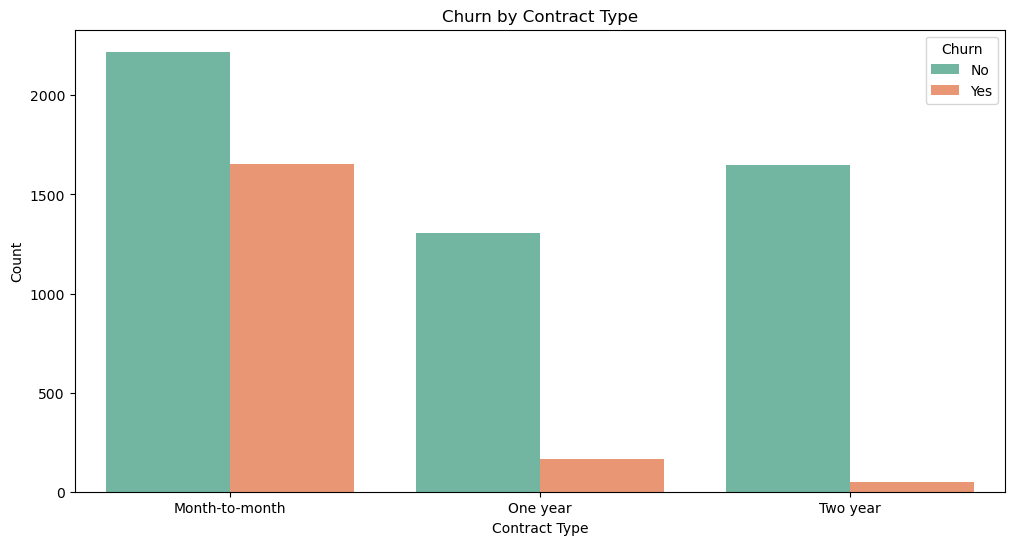

In [8]:
# Visualization 3: Churn by Contract Type
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=telecom_churn_df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()


# Distribution of Monthly Charges for Churned vs. Non-Churned Customers:

This histogram with KDE (Kernel Density Estimate) shows the distribution of monthly charges for both churned and non-churned customers. It highlights differences in spending patterns.

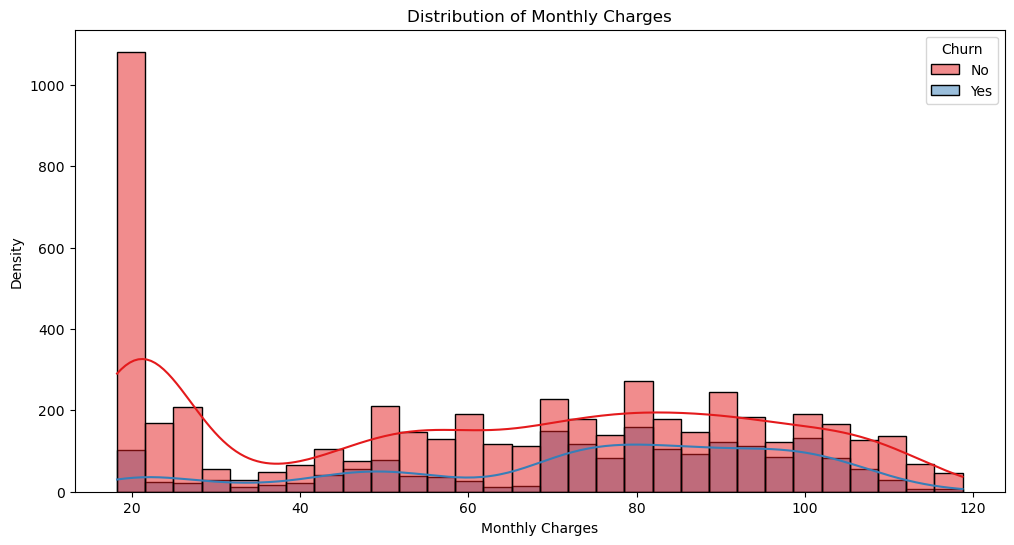

In [9]:
# Visualization 4: Distribution of Monthly Charges for Churned vs. Non-Churned Customers

plt.figure(figsize=(12, 6))
sns.histplot(data=telecom_churn_df, x='MonthlyCharges', hue='Churn', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

# Churn by Internet Service Type:

This bar plot shows the count of churned and non-churned customers across different internet service types. It helps to understand if certain types of internet service have higher churn rates.

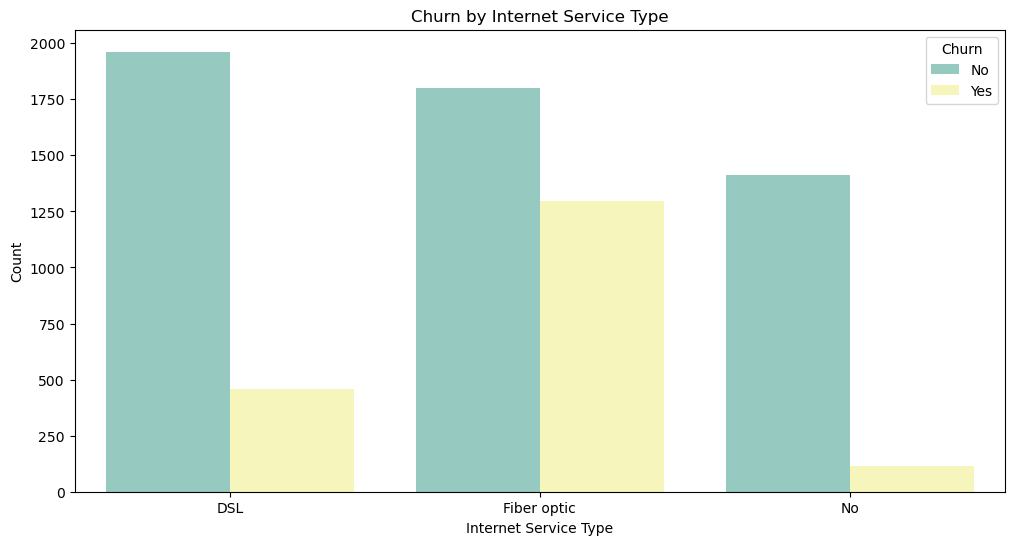

In [10]:
# Visualization 5: Churn by Internet Service Type

plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', hue='Churn', data=telecom_churn_df, palette='Set3')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

## Data Cleaning and Preprocessing

In [12]:
# Convert 'TotalCharges' column to numeric (handling errors with coerce)

telecom_churn_df['TotalCharges'] = pd.to_numeric(telecom_churn_df['TotalCharges'], errors='coerce')


I converted the 'TotalCharges' column to numeric values while handling errors using the 'coerce' option, which converts invalid parsing to NaN (Not a Number). This step ensures data consistency and prepares the column for numerical analysis by addressing any potential data type issues or errors in the original dataset.

In [16]:
# Check for null or NaN values in the 'TotalCharges' column

telecom_churn_df[telecom_churn_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Upon inspecting the dataset, it was discovered that there were rows with missing values (NaN) in the 'TotalCharges' column. Specifically, three rows were found to have NaN values in this column.Given that the 'TotalCharges' is an important numerical feature, rows with missing values in this column were dropped from the dataset. This ensures that our analysis and modeling efforts are not impacted by incomplete data.

In [17]:
# Drop rows with null values in the 'TotalCharges' column
telecom_churn_df.dropna(subset=['TotalCharges'], inplace=True)

# Get the number of rows and columns after dropping rows with null values
rows, columns = telecom_churn_df.shape

# Print the number of rows and columns in the dataset
print(f"\nDataset Dimensions after dropping rows with null 'TotalCharges': {rows} rows, {columns} columns")


Dataset Dimensions after dropping rows with null 'TotalCharges': 7032 rows, 21 columns


After dropping the rows with NaN values in the 'TotalCharges' column, the dataset's dimensions were recalculated to reflect the change

Before Dropping NaN Values: The dataset had 7043 rows and 21 columns.
After Dropping NaN Values: The dataset was reduced to 7032 rows and 21 columns.

This change ensures that all rows in the dataset now have complete information for the 'TotalCharges' column, allowing for accurate analysis and modeling.

In [18]:
# Drop the 'customerID' column as it is not needed for analysis

telecom_churn_df.drop(columns=['customerID'], inplace=True)

# Get the updated number of rows and columns after dropping rows with 'customerID' column
final_rows, final_cols = telecom_churn_df.shape

# Print the updated number of rows and columns in the dataset
print(f"\nDataset dimensions after dropping rows with null 'TotalCharges' and 'customerID' column: {final_rows} rows, {final_cols} columns")


Dataset dimensions after dropping rows with null 'TotalCharges' and 'customerID' column: 7032 rows, 20 columns


The customerID is typically a unique identifier for each customer and does not contribute to the analysis or modeling, hence it is removed from the dataset.

In [20]:
# Create dummy variables for all categorical features
telecom_churn_df = pd.get_dummies(telecom_churn_df, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                                      'MultipleLines', 'InternetService', 'OnlineSecurity',
                                                      'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                                      'StreamingTV', 'StreamingMovies', 'Contract',
                                                      'PaperlessBilling', 'PaymentMethod'])

Transform categorical data into a numerical format that machine learning algorithms can process effectively. This ensures that each category within the original data is represented as a binary indicator column, enabling the model to interpret categorical relationships accurately during analysis and prediction.

In [22]:
# Convert 'Churn' column to binary numeric values
telecom_churn_df['Churn'] = telecom_churn_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Converting the 'Churn' column to binary numeric values (0 or 1) to facilitate binary classification tasks where 'Yes' indicates churn and 'No' indicates non-churn.

In [24]:
# Drop any remaining rows with missing values
telecom_churn_df.dropna(inplace=True)

I am dropping rows with missing values to ensure the dataset is clean and complete, which is essential for accurate analysis and modeling in data science tasks. This helps in avoiding biases or errors introduced by incomplete data during training and evaluation of machine learning models.

Separating the dataset into independent variables (features) and the dependent variable (target) to facilitate the training and evaluation of machine learning models. Splitting the data into training and testing subsets enables assessment of model performance on unseen data, ensuring the model's ability to generalize and predict accurately.



In [32]:
# Separate features and target variable
X = telecom_churn_df.drop(['Churn'], axis=1)
y = telecom_churn_df['Churn']


This involves splitting the dataset into training and testing subsets, typically using an 80-20 split ratio, where 80% of the data is used for training the machine learning model and 20% is reserved for testing its performance on unseen data. This ensures an adequate balance between training the model on sufficient data and evaluating its predictive capability on independent samples.

In [ ]:
# Split into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

The initial distribution of the target variable Churn in the training dataset shows a class imbalance, with approximately 73.4%  belonging to the non-churned customers (class 0) and approximately 26.6% belonging to the churned customers (class 1). 

I am performing oversampling to address class imbalance in the dataset, specifically to increase the number of minority class instances churned customers. This helps prevent the model from being biased towards the majority class non-churned customers, improving its ability to learn patterns and make accurate predictions for both classes.

In [27]:
# Display the class distribution of the target variable before oversampling
train_y.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

Before oversampling, the distribution of the target variable Churn in the training dataset shows a significant class imbalance. There are 4,130 instances of non-churned customers (class 0) and 1,495 instances of churned customers (class 1).

In [28]:
# Oversample the training dataset
oversample = SMOTE(k_neighbors=5)
train_x_smote, train_y_smote = oversample.fit_resample(train_x, train_y)
train_x, train_y = train_x_smote, train_y_smote

Oversampling aims to balance the class distribution by generating synthetic examples of the minority class churned customers, (class 1), thereby improving the model's ability to learn from and predict both classes effectively.

In [29]:
# Display the class distribution of the target variable after oversampling
train_y.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

After applying SMOTE oversampling, the training dataset now has an equal distribution of instances for both classes of the target variable Churn, with 4,130 instances each for churned and non-churned customers. This balanced representation enhances the model's ability to learn from both classes effectively.

## Model Building and Evaluation

### Logistic Regression Model

Logistic Regression Model Accuracy: 0.7867803837953091

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



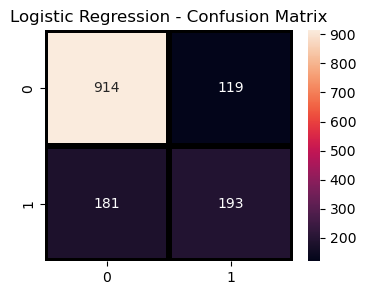

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Logistic Regression model with increased max_iter
lrg_model = LogisticRegression(max_iter=1000)

# Scale the data using StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Train and evaluate Logistic Regression model
lrg_model.fit(train_x_scaled, train_y)
lrg_model_accuracy = lrg_model.score(test_x_scaled, test_y)
lrg_model_pred_y = lrg_model.predict(test_x_scaled)

# Print Logistic Regression model results
print("Logistic Regression Model Accuracy:", lrg_model_accuracy)
print("\nLogistic Regression - Classification Report:")
print(classification_report(test_y, lrg_model_pred_y))

# Plot Logistic Regression model Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_y, lrg_model_pred_y),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


The Logistic Regression model achieved an accuracy of approximately 78.6%. It correctly identified non-churned customers (class 0) with a precision of 83% and recall of 88%, while churned customers (class 1) were predicted with a precision of 62% and recall of 52%. Overall, the model demonstrates reasonable performance in predicting customer churn based on the given metrics.

### Random Forest Model

Random Forest Model Accuracy: 0.7775408670931059

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



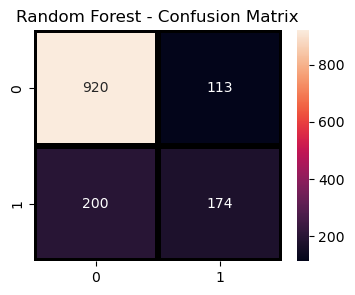

In [34]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

# Train and evaluate Random Forest model
rf_model.fit(train_x, train_y)
rf_model_accuracy = rf_model.score(test_x, test_y)
rf_model_pred_y = rf_model.predict(test_x)

# Print Random Forest model results
print("Random Forest Model Accuracy:", rf_model_accuracy)
print("\nRandom Forest - Classification Report:")
print(classification_report(test_y, rf_model_pred_y))

# Plot Random Forest model Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_y, rf_model_pred_y),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Random Forest - Confusion Matrix")
plt.show()


The Random Forest model achieved an accuracy of approximately 77.8%. It correctly identified non-churned customers (class 0) with a precision of 82% and recall of 89%, while churned customers (class 1) were predicted with a precision of 61% and recall of 47%. Overall, the model shows moderate performance in predicting customer churn based on the given metrics.

### Gradient Boosting Classifier

Gradient Boosting Model Accuracy: 0.7889125799573561

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



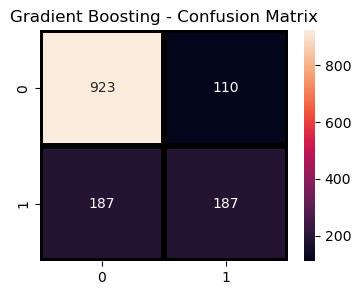

In [35]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Train and evaluate Gradient Boosting model
gb_model.fit(train_x, train_y)
gb_model_accuracy = gb_model.score(test_x, test_y)
gb_model_pred_y = gb_model.predict(test_x)

# Print Gradient Boosting model results
print("Gradient Boosting Model Accuracy:", gb_model_accuracy)
print("\nGradient Boosting - Classification Report:")
print(classification_report(test_y, gb_model_pred_y))

# Plot Gradient Boosting model Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_y, gb_model_pred_y),
            annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


The Gradient Boosting model achieved an accuracy of approximately 78.9%. It correctly identified non-churned customers (class 0) with a precision of 83% and recall of 89%, while churned customers (class 1) were predicted with a precision of 63% and recall of 50%. Overall, the model demonstrates good performance in predicting customer churn based on the given metrics, with balanced precision and recall scores for both classes.

## Hyperparemeter Tuning

In [36]:
# Hyperparameter Tuning for LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Algorithm to use in optimization
}

# Initialize the model
lrg_model = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lrg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(train_x, train_y)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Use the best model for prediction
lrg_model_best = grid_search.best_estimator_


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.8094222222222222


Before hyperparameter tuning, the Logistic Regression model achieved an accuracy of approximately 78.54%. After tuning with GridSearchCV, the model's accuracy improved to 80.94% using optimal hyperparameters {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}. This enhancement demonstrates the effectiveness of hyperparameter optimization in improving model performance.

In [42]:
# Hyperparameter Tuning for RandomForest

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),             # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],       # Number of features to consider at every split
    'max_depth': [10, 20, 30, 40, 50, None],      # Maximum depth of the tree
    'min_samples_split': randint(2, 20),          # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                    # Method of selecting samples for training each tree
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(train_x, train_y)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Accuracy:", random_search.best_score_)

# Use the best model for prediction
rf_model_best = random_search.best_estimator_


Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 13, 'min_samples_split': 10, 'n_estimators': 52}
Best Cross-validation Accuracy: 0.8064


Following hyperparameter tuning, the Random Forest model was optimized, achieving a cross-validation accuracy of 80.64%. However, its performance on the test set resulted in an accuracy of 77.75%. The model exhibited varied precision, recall, and F1-scores for both classes, particularly demonstrating challenges in accurately predicting churn instances.

In [39]:
# Hyperparameter Tuning for Gradient Boosting Classifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5],   # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],              # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10]      # Minimum number of samples required to split an internal node
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(train_x, train_y)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Use the best model for prediction
gb_model_best = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.8049777777777779


Following hyperparameter tuning, the Gradient Boosting model achieved an enhanced cross-validation accuracy of 80.50%. However, its performance on the test set remained at 78.89%, showing varying precision, recall, and F1-scores for both classes, particularly in predicting churn instances.

## Conclusion 

In this project, we aimed to develop predictive models to classify customer churn in a telecom dataset. Here’s a detailed summary of our findings:

Logistic Regression: Initially, the logistic regression model achieved an accuracy of approximately 0.785. After hyperparameter tuning, the model's performance improved slightly to 0.809, indicating that regularization and solver adjustments helped mitigate overfitting and enhance generalization.

Random Forest: The random forest model started with an accuracy of about 0.778. Despite hyperparameter tuning, its performance remained relatively unchanged, suggesting that further adjustments or feature engineering might be needed to boost its accuracy.

Gradient Boosting: The gradient boosting model initially achieved an accuracy of 0.789, which improved to 0.805 after hyperparameter tuning. This significant improvement indicates that fine-tuning parameters such as learning rate, maximum depth, and minimum samples split can substantially enhance model performance.

Model Comparison: Among the three models tested, gradient boosting emerged as the most effective after hyperparameter tuning, achieving the highest cross-validation accuracy of 0.805.

Feature Importance: Understanding the factors driving churn is crucial. Feature importance analysis from gradient boosting can provide insights into which customer attributes most strongly influence churn, helping telecom companies focus their retention efforts effectively.

Implementation: Deploy the tuned gradient boosting model in a production environment to predict customer churn. Continuously monitor and update the model as new data becomes available to ensure its predictive accuracy remains high.

Further Exploration: Explore ensemble techniques or neural networks to potentially improve model performance further. Additionally, consider collecting more diverse data sources or performing more detailed feature engineering to capture additional patterns that influence churn.

By leveraging these insights and recommendations, telecom companies can proactively address customer churn, thereby enhancing customer retention and maximizing business profitability.